In [164]:
%load_ext autoreload
%autoreload 2

from utils.data_preprocessing import *
import pandas as pd

file_path = r'.\Bottleneck_Data\uo-180-180.txt'
# file_path = r'.\Corridor_Data\ug-180-060.txt'

# read file
column_names = ['ID', 'FRAME', 'X', 'Y', 'Z']
data = pd.read_csv(file_path, delimiter=' ', names=column_names)


t = Trajectories()
for i in range(len(data)):
    t.add_frame(data['FRAME'][i],data['ID'][i],data['X'][i],data['Y'][i])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# The following code is used to generate the C data point set.

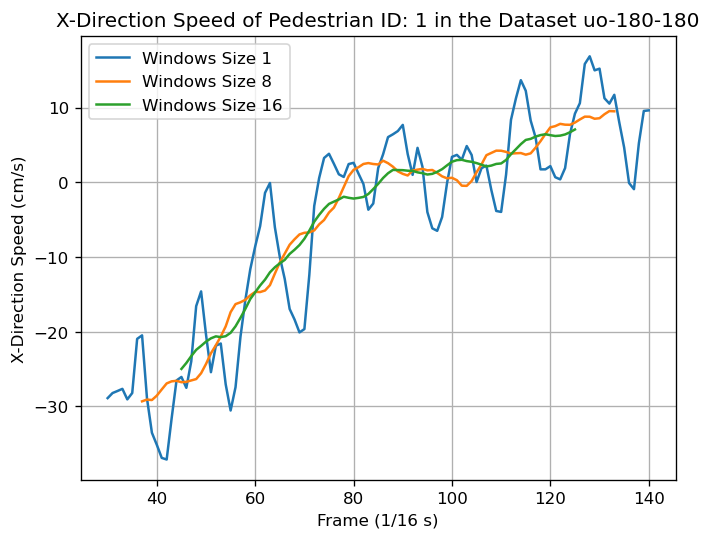

In [165]:
t.calculate_speed_only_plot(file_path = file_path, plot_number = 1)

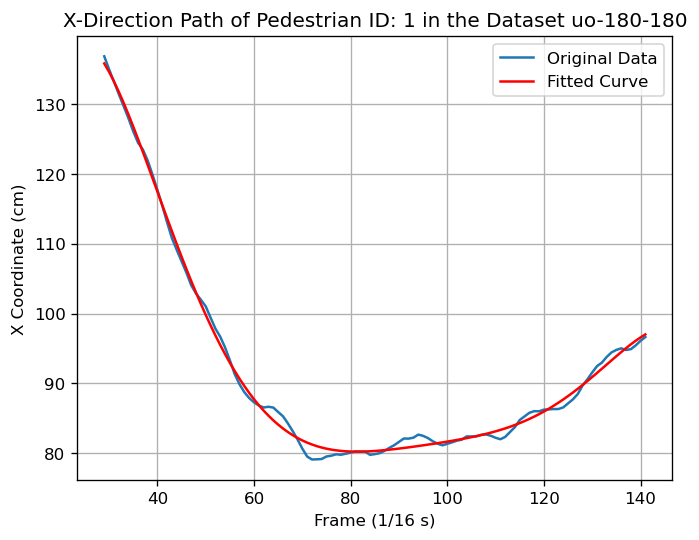

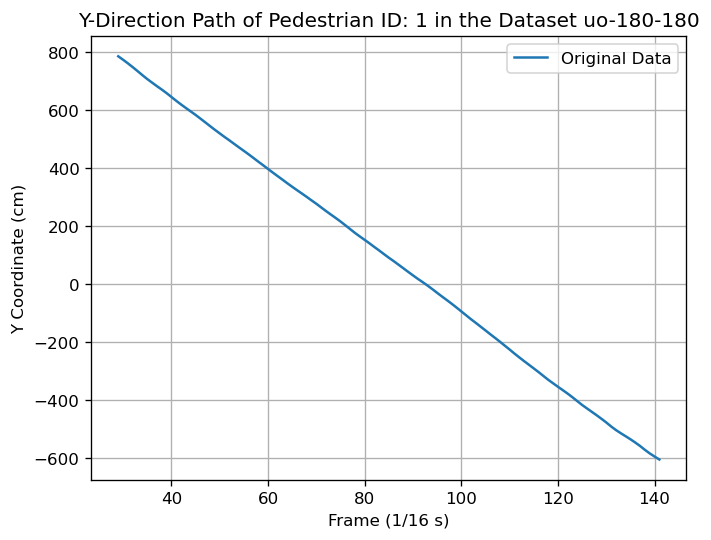

In [166]:
t.path_curve_fitting_only_plot(degree = 6, file_path = file_path, plot_number = 1)

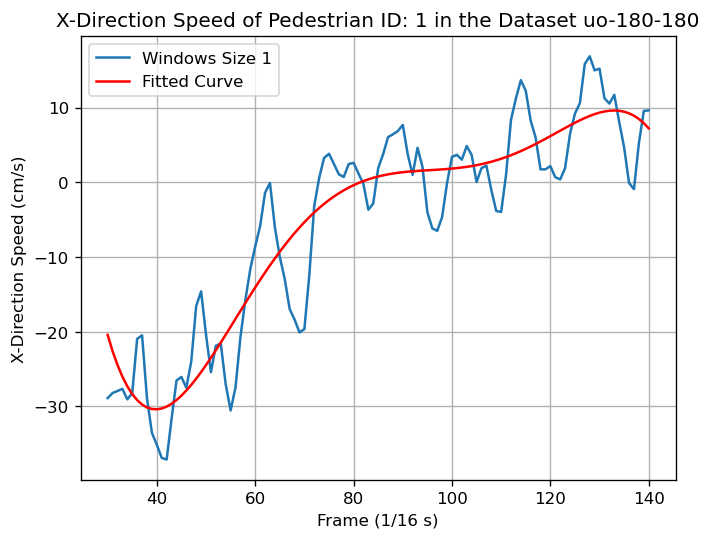

In [167]:
t.combine_only_plot(degree = 6, file_path = file_path, plot_number = 1)

# The following code is used to generate the C data point set.

In [290]:
def get_all_file_paths(folder_path):
    # Initialize an empty list to store file paths
    file_paths = []
    
    # Iterate through the directory tree using os.walk
    for root, dirs, files in os.walk(folder_path):
        # Iterate through the files in the current directory
        for file in files:
            # Append the full path of each file to the list
            file_paths.append(os.path.join(root, file))
    
    # Return the list of file paths
    return file_paths

# List of folder names to process

folder_names = ['Corridor_Data']


# Initialize an empty list to store all file paths
all_file_paths = []

# Iterate through each folder name
for folder_name in folder_names:
    # Construct the full path of the current folder
    folder_path = os.path.join(os.getcwd(), folder_name)
    
    # Extend the list of file paths with the paths from the current folder
    all_file_paths.extend(get_all_file_paths(folder_path))

# Print the relative paths of all files
for path in all_file_paths:
    print(path)

data_point = []
for i in range(len(all_file_paths)):
    file_path = all_file_paths[i]
    print(str(i+1) +"/" +str(len(all_file_paths))+ " procesing: " + file_path)
    
    # read file
    column_names = ['ID', 'FRAME', 'X', 'Y', 'Z']
    data = pd.read_csv(file_path, delimiter=' ', names=column_names)

    t = Trajectories()
    for i in range(len(data)):
        t.add_frame(data['FRAME'][i],data['ID'][i],data['X'][i],data['Y'][i])
    t.path_curve_fitting(degree = 6)
    t.calculate_speed(windows_size_x = 1, windows_size_y = 8, x_new = True)


    f = Frames(t)
    for i in range(len(data)):
        f.add_frame(data['FRAME'][i],data['ID'][i],data['X'][i],data['Y'][i])
    f.calculate_neighbors(k = 10)

    for id_frame, value in f.frames.items():
        if len(value) != 0:
            for i in value:
                if len(i['relative_position']) != 0:
                    x = i['relative_position'][:,0]
                    y = i['relative_position'][:,1]
                    v = i['relative_speed'][:,0]
                    u = i['relative_speed'][:,1]
                    s = i['Sk']
                    label_speed = + np.sqrt(i['v']**2 + i['u']**2)
                    result_array = np.concatenate((x, y, v, u))
                    result_array = np.append(result_array, s)
                    result_array = np.append(result_array, label_speed)
                    result_array = np.round(result_array, decimals=3).tolist()
                    data_point.append(result_array)

data_point= np.array(data_point)/100

# File name to write to

file_name = 'C.txt'


# Open the file in append mode
with open(file_name, 'w') as file:
    # Iterate over each row of the two-dimensional list
    # and write it to the file as comma-separated values
    for row in data_point:
        file.write(' '.join(map(str, row)) + '\n')
            
print('finish')


data_point.shape

C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-015.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-030.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-060.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-085.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-095.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-110.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-140.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-230.txt
1/8 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Corridor_Data\ug-180-015.txt
2/8 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exer

(791023, 42)

# The following code is used to generate the B data point set.

In [291]:
def get_all_file_paths(folder_path):
    # Initialize an empty list to store file paths
    file_paths = []
    
    # Iterate through the directory tree using os.walk
    for root, dirs, files in os.walk(folder_path):
        # Iterate through the files in the current directory
        for file in files:
            # Append the full path of each file to the list
            file_paths.append(os.path.join(root, file))
    
    # Return the list of file paths
    return file_paths

# List of folder names to process
folder_names = ['Bottleneck_Data']

# Initialize an empty list to store all file paths
all_file_paths = []

# Iterate through each folder name
for folder_name in folder_names:
    # Construct the full path of the current folder
    folder_path = os.path.join(os.getcwd(), folder_name)
    
    # Extend the list of file paths with the paths from the current folder
    all_file_paths.extend(get_all_file_paths(folder_path))

# Print the relative paths of all files
for path in all_file_paths:
    print(path)

data_point = []
for i in range(len(all_file_paths)):
    file_path = all_file_paths[i]
    print(str(i+1) +"/" +str(len(all_file_paths))+ " procesing: " + file_path)
    
    # read file
    column_names = ['ID', 'FRAME', 'X', 'Y', 'Z']
    data = pd.read_csv(file_path, delimiter=' ', names=column_names)

    t = Trajectories()
    for i in range(len(data)):
        t.add_frame(data['FRAME'][i],data['ID'][i],data['X'][i],data['Y'][i])
    t.path_curve_fitting(degree = 6)
    t.calculate_speed(windows_size_x = 1, windows_size_y = 8, x_new = True)


    f = Frames(t)
    for i in range(len(data)):
        f.add_frame(data['FRAME'][i],data['ID'][i],data['X'][i],data['Y'][i])
    f.calculate_neighbors(k = 10)

    for id_frame, value in f.frames.items():
        if len(value) != 0:
            for i in value:
                if len(i['relative_position']) != 0:
                    x = i['relative_position'][:,0]
                    y = i['relative_position'][:,1]
                    v = i['relative_speed'][:,0]
                    u = i['relative_speed'][:,1]
                    s = i['Sk']
                    label_speed = + np.sqrt(i['v']**2 + i['u']**2)
                    result_array = np.concatenate((x, y, v, u))
                    result_array = np.append(result_array, s)
                    result_array = np.append(result_array, label_speed)
                    result_array = np.round(result_array, decimals=3).tolist()
                    data_point.append(result_array)

data_point= np.array(data_point)/100

# File name to write to
file_name = 'B.txt'

# Open the file in append mode
with open(file_name, 'w') as file:
    # Iterate over each row of the two-dimensional list
    # and write it to the file as comma-separated values
    for row in data_point:
        file.write(' '.join(map(str, row)) + '\n')
            
print('finish')


data_point.shape

C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-070.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-095.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-120.txt
C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-180.txt
1/4 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-070.txt
2/4 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-095.txt
3/4 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-120.txt
4/4 procesing: C:\Users\Jianfeng Yue\OneDrive\Desktop\Exercises-MLCMS-Group-C\Exercise-6\Bottleneck_Data\uo-180-180.txt
finish


(240186, 42)